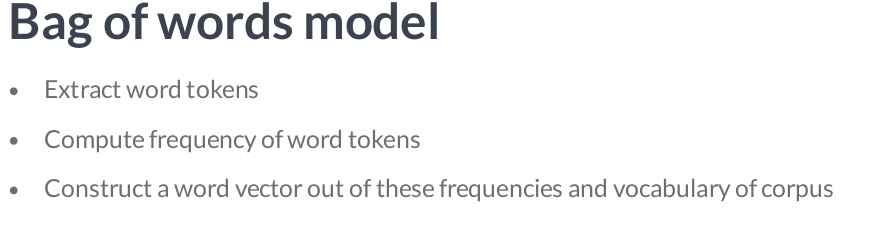

In [25]:
import pandas as pd

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

corpus = pd.Series([
'The lion is the king of the jungle',
'Lions have lifespans of a decade',
'The lion is an endangered species'
])


# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)

# Print the shape of bow_matrix
print(bow_matrix.shape)


(3, 13)


In [6]:
!wget https://assets.datacamp.com/production/repositories/4375/datasets/4281f3352173b69c17965c8f5261603cc18c7d0b/movie_reviews_clean.csv

--2020-02-28 00:15:28--  https://assets.datacamp.com/production/repositories/4375/datasets/4281f3352173b69c17965c8f5261603cc18c7d0b/movie_reviews_clean.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 54.192.151.84, 54.192.151.30, 54.192.151.57, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|54.192.151.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1227546 (1.2M) [text/csv]
Saving to: ‘movie_reviews_clean.csv’

movie_reviews_clean 100%[===================>]   1.17M   332KB/s    in 3.6s    

2020-02-28 00:15:33 (332 KB/s) - ‘movie_reviews_clean.csv’ saved [1227546/1227546]



In [7]:
import pandas as pd

df = pd.read_csv('movie_reviews_clean.csv')

In [8]:
df.head()

,review,sentiment
0,this anime series starts out great interesting...,0
1,some may go for a film like this but i most as...,0
2,i ve seen this piece of perfection during the ...,1
3,this movie is likely the worst movie i ve ever...,0
4,it ll soon be 10 yrs since this movie was rele...,1


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.review, df.sentiment, test_size=0.2)

In [11]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# Fit and transform X_train
X_train_bow = vectorizer.fit_transform(X_train)

# Transform X_test
X_test_bow = vectorizer.transform(X_test)

# Print shape of X_train_bow and X_test_bow
print(X_train_bow.shape)
print(X_test_bow.shape)

(800, 15539)
(200, 15539)


In [14]:
from sklearn.naive_bayes import MultinomialNB

# Create a MultinomialNB object
clf = MultinomialNB()

# Fit the classifier
clf.fit(X_train_bow, y_train)

# Measure the accuracy
accuracy = clf.score(X_test_bow, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was terrible. The music was underwhelming and the acting mediocre."
prediction = clf.predict(vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.770
The sentiment predicted by the classifier is 0


# Building n-gram models

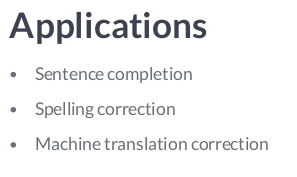

In [19]:
import pandas as pd

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
bigrams = CountVectorizer(ngram_range=(2,2))

corpus = pd.Series([
'The lion is the king of the jungle',
'Lions have lifespans of a decade',
'The lion is an endangered species'
])


# Generate matrix of word vectors
bow_matrix = bigrams.fit(corpus)

bow_matrix.vocabulary_

{'the lion': 13,
 'lion is': 7,
 'is the': 4,
 'the king': 12,
 'king of': 5,
 'of the': 10,
 'the jungle': 11,
 'lions have': 8,
 'have lifespans': 2,
 'lifespans of': 6,
 'of decade': 9,
 'is an': 3,
 'an endangered': 0,
 'endangered species': 1}

In [20]:
bigrams = CountVectorizer(ngram_range=(1,3))

corpus = pd.Series([
'The lion is the king of the jungle',
'Lions have lifespans of a decade',
'The lion is an endangered species'
])


# Generate matrix of word vectors
bow_matrix = bigrams.fit(corpus)

bow_matrix.vocabulary_

{'the': 33,
 'lion': 21,
 'is': 9,
 'king': 15,
 'of': 28,
 'jungle': 14,
 'the lion': 37,
 'lion is': 22,
 'is the': 12,
 'the king': 35,
 'king of': 16,
 'of the': 30,
 'the jungle': 34,
 'the lion is': 38,
 'lion is the': 24,
 'is the king': 13,
 'the king of': 36,
 'king of the': 17,
 'of the jungle': 31,
 'lions': 25,
 'have': 6,
 'lifespans': 18,
 'decade': 3,
 'lions have': 26,
 'have lifespans': 7,
 'lifespans of': 19,
 'of decade': 29,
 'lions have lifespans': 27,
 'have lifespans of': 8,
 'lifespans of decade': 20,
 'an': 0,
 'endangered': 4,
 'species': 32,
 'is an': 10,
 'an endangered': 1,
 'endangered species': 5,
 'lion is an': 23,
 'is an endangered': 11,
 'an endangered species': 2}

In [23]:
bigrams = CountVectorizer(ngram_range=(3,3))

corpus = pd.Series([
'The lion is the king of the jungle',
'Lions have lifespans of a decade',
'The lion is an endangered species'
])


# Generate matrix of word vectors
bow_matrix = bigrams.fit(corpus)

bow_matrix.vocabulary_

{'the lion is': 11,
 'lion is the': 7,
 'is the king': 3,
 'the king of': 10,
 'king of the': 4,
 'of the jungle': 9,
 'lions have lifespans': 8,
 'have lifespans of': 1,
 'lifespans of decade': 5,
 'lion is an': 6,
 'is an endangered': 2,
 'an endangered species': 0}